In [6]:
toliman_settings = {
                    # Eduardo's values:
                    'diam': 0.001 * 2. * 150, 
                    'm1_fl': 0.5717255, 
                    'm1_m2_sep': 0.54933763033373, 
                    'm2_fl': -0.02337895948640,  
                    'bfl': 0.52761,#0.58999999998985,  
                    'm2_rad': 0.00590401477581,
                    'm1_conic': -1.00011470000000,
                    'm2_conic': -1.16799179177759,
                    # Go for 5-fold symmetry to match assumed rosette
                    'm2_strut_width': 0.01,
                    'm2_supports': 5,
                    'beam_ratio': 0.2,
                    'tilt_x': 0.00,
                    'tilt_y': 0.00
                    }

gridsize = 2048 # sampling of wavefront
detector_pitch = 11.0e-6 # m/pixel on detector
npixels = 512 # Size of detector, in pixels
npsf = npixels*2
common_sampling = detector_pitch/2. # for Nyquist 

In [7]:
# First source
import proper
import numpy as np
from proper_tools import normalise_sampling
from proper_tools import combine_psfs

settings = toliman_settings.copy()
settings['tilt_x'] = 0.00
settings['tilt_y'] = 0.00

n_wavelengths = 5 # sampling of spectrum
wl_min = 0.5 # microns -> 500 nm
wl_max = 0.6 # microns -> 600 nm
wavelengths = np.linspace(wl_min, wl_max, num=n_wavelengths)
wl_weights = [1. / n_wavelengths for i in range(n_wavelengths)] # Relative intensity of each wavefront

(wavefronts, samplings) = proper.prop_run_multi('prescription_rc_conic', wavelengths, gridsize = gridsize, QUIET=True, PRINT_INTENSITY=False, PASSVALUE=toliman_settings)
psfs = normalise_sampling(wavefronts, samplings, common_sampling, npsf)

psf_a = combine_psfs(psfs, wl_weights)

/media/sf_Toliman/toliman/image_modelling/proper_tools.py:34: ComplexWarning: Casting complex values to real discards the imaginary part
  out[i,:,:] = proper.prop_magnify(wf, mag, npsf, CONSERVE = True)


In [8]:
# Second source
import proper
import numpy as np
from proper_tools import normalise_sampling
from proper_tools import combine_psfs

settings = toliman_settings.copy()
settings['tilt_x'] = 3.00
settings['tilt_y'] = 1.00

n_wavelengths = 5 # sampling of spectrum
wl_min = 0.5 # microns -> 500 nm
wl_max = 0.6 # microns -> 600 nm
wavelengths = np.linspace(wl_min, wl_max, num=n_wavelengths)
wl_weights = [2. / n_wavelengths for i in range(n_wavelengths)] # Relative intensity of each wavefront

(wavefronts, samplings) = proper.prop_run_multi('prescription_rc_conic', wavelengths, gridsize = gridsize, QUIET=True, PRINT_INTENSITY=False, PASSVALUE=toliman_settings)
psfs = normalise_sampling(wavefronts, samplings, common_sampling, npsf)

psf_b = combine_psfs(psfs, wl_weights)

/media/sf_Toliman/toliman/image_modelling/proper_tools.py:34: ComplexWarning: Casting complex values to real discards the imaginary part
  out[i,:,:] = proper.prop_magnify(wf, mag, npsf, CONSERVE = True)


/home/ubuntu/miniconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


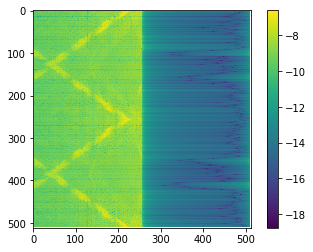

In [19]:
# First PSF
%matplotlib inline
import matplotlib.pyplot as plt
from proper_tools import fix_prop_pixellate
detector_image_a = fix_prop_pixellate(psf_a, common_sampling, detector_pitch)

plt.imshow(np.log10(detector_image_a), interpolation = 'none', cmap='viridis')
plt.colorbar()
plt.show()


/home/ubuntu/miniconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


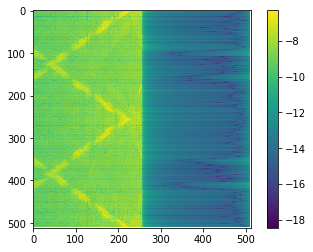

In [20]:
# Second PSF
%matplotlib inline
import matplotlib.pyplot as plt
from proper_tools import fix_prop_pixellate
detector_image_b = fix_prop_pixellate(psf_b, common_sampling, detector_pitch)

plt.imshow(np.log10(detector_image_b), interpolation = 'none', cmap='viridis')
plt.colorbar()
plt.show()


In [15]:
import numpy as np
from proper_tools import fix_prop_pixellate
psf_both = combine_psfs(np.stack((psf_a, psf_b)), [1., 1.])
detector_image = fix_prop_pixellate(psf_both, common_sampling, detector_pitch)

/home/ubuntu/miniconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


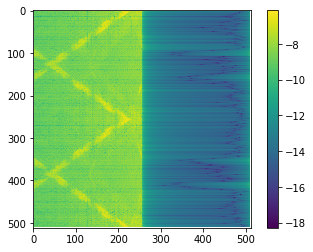

In [18]:
# Combined PSF
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(np.log10(detector_image), interpolation = 'none', cmap='viridis')
plt.colorbar()
plt.show()